<p style="font-size:200%;font-weight:bold"> Index </p>
- Author: Yichen Luo
- Date: 2022-03-09

- RI和PI_的意义
- 俄罗斯用的是USD
- 委内瑞拉IBC

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.options.mode.chained_assignment = None
os.getcwd()

RD = '/home/data/refinitiv/ds_eq/index/'
WD = '/home/team_crypto/2022_crypto_return/03_wdata/0001_teaching/'

# 读取文件

In [2]:
df = pd.read_csv(f'{RD}ds2indexdata.csv')
df

,DSIndexCode,ValueDate,PI_,RI,MV,LicFlag
0,3,19990104,4098.4883,1643.0198,42627.524,32
1,3,19990105,4088.7698,1639.1199,42526.450,32
2,3,19990106,4165.7383,1669.9800,43326.993,32
3,3,19990107,4147.2266,1662.5599,43153.426,32
4,3,19990108,4384.0000,1757.4700,45616.985,32
...,...,...,...,...,...,...
344660688,158376,20220126,1305.0301,1918.8799,NaN,32
344660689,158376,20220127,1304.0401,1917.4100,NaN,32
344660690,158376,20220128,1296.9000,1906.9200,NaN,32
344660691,158376,20220131,1310.2000,1926.4800,NaN,32


# 小范围实验

In [104]:
dfm = df.loc[df['DSIndexCode'] == 40787]
dfm

,DSIndexCode,ValueDate,PI_,RI,MV,LicFlag
185849703,40787,19880104,101.883900,NaN,NaN,32
185849704,40787,19880105,98.192994,NaN,NaN,32
185849705,40787,19880106,88.379288,NaN,NaN,32
185849706,40787,19880107,86.606690,NaN,NaN,32
185849707,40787,19880108,87.421296,NaN,NaN,32
...,...,...,...,...,...,...
185858249,40787,20220126,51037.051000,75472.188,NaN,32
185858250,40787,20220127,50466.020000,74627.750,NaN,32
185858251,40787,20220128,50661.860000,74917.375,NaN,32
185858252,40787,20220131,51330.852000,75906.625,NaN,32


In [105]:
dfm['ValueDate'] = dfm['ValueDate'].apply(str)
dfm['ValueDate'] = pd.to_datetime(dfm['ValueDate'])
dfm = dfm.loc[dfm['ValueDate'] >= '2014-01-01']
dfm['ValueDate'].describe(datetime_is_numeric=True)
dfm.set_index('ValueDate', inplace=True)

count                             2034
mean     2018-01-18 05:28:29.734513152
min                2014-01-02 00:00:00
25%                2016-01-12 06:00:00
50%                2018-01-17 12:00:00
75%                2020-01-27 18:00:00
max                2022-02-01 00:00:00
Name: ValueDate, dtype: object

<AxesSubplot:xlabel='ValueDate'>

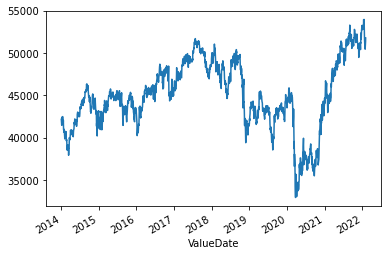

In [106]:
dfm['PI_'].plot()

<AxesSubplot:xlabel='ValueDate'>

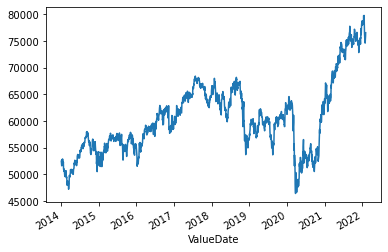

In [107]:
dfm['RI'].plot()

In [108]:
dfm[['PI_', 'RI']].describe()
dfm['PI_'].isna().sum()
dfm['RI'].isna().sum()

,PI_,RI
count,2034.000000,2034.000000
mean,45077.706421,60544.479056
std,4014.930644,6733.711476
min,32964.219000,46425.149000
25%,42852.817000,55545.833000
50%,44914.623500,59758.188000
75%,48271.927000,64546.292250
max,53973.270000,79810.375000


0

0

In [29]:
dfm['stock_markets'] = 'China'
dfm

,DSIndexCode,PI_,RI,MV,LicFlag,stock_markets
ValueDate,,,,,,
2005-04-08,976,1003.44490,1003.45000,2310779.0,32,China
2005-04-11,976,995.42090,995.41993,2291236.0,32,China
2005-04-12,976,978.69678,978.69996,2252870.0,32,China
2005-04-13,976,1000.90000,1000.90000,2304122.0,32,China
2005-04-14,976,986.97486,986.97999,2279711.0,32,China
...,...,...,...,...,...,...
2022-01-24,976,4786.73830,6347.84770,46850256.0,32,China
2022-01-25,976,4678.44930,6204.24220,45807952.0,32,China
2022-01-26,976,4712.31250,6249.14460,46138288.0,32,China


# 拼接

In [109]:
dfs=[]
for i, j, k in [(976, 'China', 'RI'), 
                (41620, 'US', 'RI'), 
                (38502, 'Japan', 'RI'), 
                (41596, 'Russia', 'RI'),
                (36888, 'UK', 'RI'),
                (35252, 'France', 'RI'),
                (13095, 'Germany', 'RI'),
                (48159, 'Turkey', 'PI_'),
                (48596, 'Venezuela', 'PI_'),
                (40787, 'Mexico', 'RI')
               ]:
    dfm = df.loc[df['DSIndexCode'] == i]
    dfm['stock_markets'] = j
    dfm['prc'] = dfm[k]
    dfs.append(dfm)

idx = pd.concat(dfs)
idx

,DSIndexCode,ValueDate,PI_,RI,MV,LicFlag,stock_markets,prc
4982134,976,20050408,1003.44490,1003.45000,2310779.0,32,China,1003.45000
4982135,976,20050411,995.42090,995.41993,2291236.0,32,China,995.41993
4982136,976,20050412,978.69678,978.69996,2252870.0,32,China,978.69996
4982137,976,20050413,1000.90000,1000.90000,2304122.0,32,China,1000.90000
4982138,976,20050414,986.97486,986.97999,2279711.0,32,China,986.97999
...,...,...,...,...,...,...,...,...
185858249,40787,20220126,51037.05100,75472.18800,NaN,32,Mexico,75472.18800
185858250,40787,20220127,50466.02000,74627.75000,NaN,32,Mexico,74627.75000
185858251,40787,20220128,50661.86000,74917.37500,NaN,32,Mexico,74917.37500
185858252,40787,20220131,51330.85200,75906.62500,NaN,32,Mexico,75906.62500


# 检验

<AxesSubplot:>

,DSIndexCode,ValueDate,PI_,RI,MV,LicFlag,stock_markets,prc
189817113,41620,19631231,75.020005,NaN,NaN,32,US,NaN
189817114,41620,19640102,75.429993,NaN,NaN,32,US,NaN
189817115,41620,19640103,75.500000,NaN,NaN,32,US,NaN
189817116,41620,19640106,75.669999,NaN,NaN,32,US,NaN
189817117,41620,19640107,75.690003,NaN,NaN,32,US,NaN
...,...,...,...,...,...,...,...,...
189832125,41620,20220125,4356.449300,9134.3282,36887216.0,32,US,9134.3282
189832126,41620,20220126,4349.929700,9120.7500,36831968.0,32,US,9120.7500
189832127,41620,20220127,4326.511800,9072.2383,36633696.0,32,US,9072.2383
189832128,41620,20220128,4431.851600,9294.2110,37525600.0,32,US,9294.2110


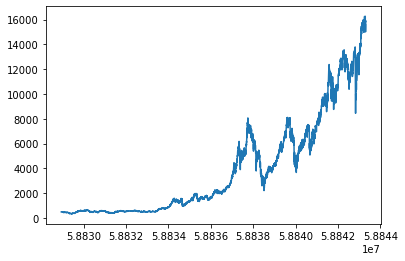

In [110]:
idx.loc[idx['stock_markets'] == 'Germany', 'prc'].plot()
idx.loc[idx['stock_markets'] == 'US']

# 储存

In [111]:
idx.drop(columns = ['DSIndexCode', 'PI_', 'RI', 'LicFlag'], inplace=True)
idx

,ValueDate,MV,stock_markets,prc
4982134,20050408,2310779.0,China,1003.45000
4982135,20050411,2291236.0,China,995.41993
4982136,20050412,2252870.0,China,978.69996
4982137,20050413,2304122.0,China,1000.90000
4982138,20050414,2279711.0,China,986.97999
...,...,...,...,...
185858249,20220126,NaN,Mexico,75472.18800
185858250,20220127,NaN,Mexico,74627.75000
185858251,20220128,NaN,Mexico,74917.37500
185858252,20220131,NaN,Mexico,75906.62500


In [112]:
idx.to_parquet(f'{WD}2101_index.pq')